$\textbf{Introduction}$
In this exercise we will load in data and do quantile regression with the return data from 20 GSIB's. 
The banks are listed in the Table for Section 4.  The control variables are listed in the same section.
We first read in the data:




In [1]:

TAB1 = readtable('McNYet_May2020_CovarData.xlsx');
date1 = table2array(TAB1(:,1));
StateVar  = table2array(TAB1(:,2:10));
SharePrice = table2array(TAB1(:,11:30));
TraceVol = table2array(TAB1(:,31:50));
MarketCap = table2array(TAB1(:,51:70));
index = 6:5:length(StateVar); index = index';   %Convert daily data to weekly data
index1 = 1:5:length(StateVar); index1 = index1';
StateVar1 = StateVar(index1,:);
StateVar1 = StateVar1(1:end-1,:);
MarketCap2 = MarketCap(index1,:);   % Replace any zeros with lagged values
for i = 2:length(MarketCap2(:,7)), 
    if MarketCap2(i,7) == 0, 
        MarketCap2(i,7) = MarketCap2(i-1,7); 
    end; 
end;

Return = diff(log(MarketCap2));   % Calculate weekly returns
Return = - Return;    % Reverse the returns to negative returns




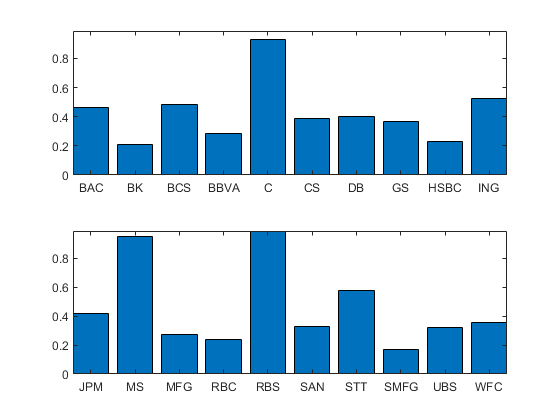

In [3]:
BankNames1 = {'BAC','BK','BCS','BBVA', 'C', 'CS', 'DB', 'GS', 'HSBC', 'ING','JPM', 'MS', ...
    'MFG', 'RBC', 'RBS', 'SAN', 'STT', 'SMFG', 'UBS,' 'WFC'};
BankNames2 = char(BankNames1);
MaxRet = max(Return); 
a1 =subplot(211); ...
bar(MaxRet(1:10)); axis([1,10, -1,1]);axis tight; ...
names = {'BAC';'BK';'BCS';'BBVA'; 'C'; 'CS'; 'DB'; 'GS'; 'HSBC'; 'ING'}; ...
set(gca,'xtick',[1:10],'xticklabel',names);...
a2 = subplot(212); ...
bar(MaxRet(11:20)); axis([1,10,-1,1]); axis tight;...
names1 = {'JPM'; 'MS'; ,'MFG'; 'RBC'; 'RBS'; 'SAN'; 'STT'; 'SMFG'; 'UBS'; 'WFC'};
set(gca,'xtick',[1:10],'xticklabel',names1);
linkaxes([a1, a2], 'y'); 


    

As we can see, some of the banks took heavy losses in market capitalization, particularly the RBS, but so did C (Citicorp) and MS.  The question for us is the following:  are the heavy losers also the biggest transmitters of risk to the rest of the financial system?

In [4]:
% Calculate weighted return for the market
MarketCap2 = MarketCap2(2:end,:);
SMC2 = sum(MarketCap2,2);
SMC3 = kron(ones(1,20), SMC2);
RatioMC = MarketCap2./SMC3;
AveReturn1 = -Return .* RatioMC;
WeightedReturn = sum(AveReturn1,2);

In [6]:
who


Your variables are:

AveReturn1      MarketCap2      Return          SMC3            StateVar        TAB1            WeightedReturn  i               index1          
MarketCap       RatioMC         SMC2            SharePrice      StateVar1       TraceVol        date1           index           




In [5]:
date2 = date1(index1,:);
date2 = date2(2:end,:);


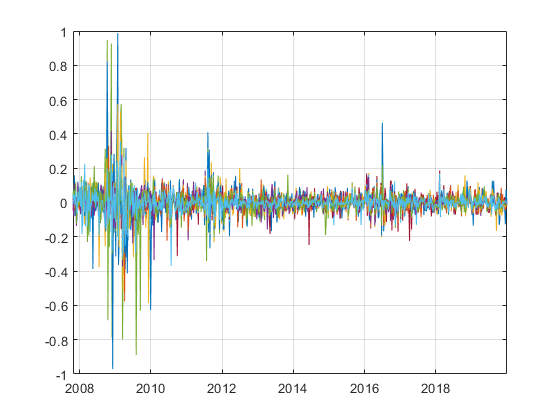

In [8]:
plot(date2, Return);  grid;    % Plot weighted market returns

In [9]:
for i = 1:20,
    RETURN = Return;
    MARKETCAP2 = MarketCap2;
    RETURN(:,i) = [];
    MARKETCAP2(:,i) = [];
    WRETURN1 = RETURN.*MARKETCAP2;
    SRETURN1 = sum(MARKETCAP2,2);
    SRETURN2 = kron(ones(1,19), SRETURN1);
    SYSTEMRET = WRETURN1./SRETURN2;  
    SYSTEMRET = sum(SYSTEMRET,2);
    xx = [Return(:,i) StateVar1];
    yy = SYSTEMRET;
    % clear RETURN MARKETCAP2;
    %  p,stats]=quantreg(x,y,tau[,order,nboot]);
    tau1= .95;
    tau2 = .50;
    nst = [3];
    [p1, stats1] = quantreg(xx,yy,tau1,[],100);
    [p2, stats2] = quantreg(xx,yy,tau2,[],100);
    %yhat05 = netquantile(xx,yy,tau1,nst);
    %yhat50 = netquantile(xx,yy,tau2,nst);
    VARq05(:,i) = stats1.yfit;
    VARq50(:,i) = stats2.yfit;
    DCOVAR(:,i) = (VARq05(:,i)-VARq50(:,i));
    %DCOVARnet(:,i) = yhat05 - yhat50;
end;

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase MaxFunEvals option.
         Current function value: 1.547373 

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase MaxFunEvals option.
         Current function value: 4.724616 

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase MaxFunEvals option.
         Current function value: 6.036754 

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase MaxFunEvals option.
         Current function value: 5.909086 

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase MaxFunEvals option.
         Current function value: 2.410698 

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase MaxFunEvals option.
         Current function value: 5.912467 

 
Exiting: Maximum number of function evaluations has been exceeded
         - increase 

In [10]:
who


Your variables are:

AveReturn1      MarketCap2      SMC2            SYSTEMRET       TAB1            WRETURN1        i               p1              tau1            
DCOVAR          RETURN          SMC3            SharePrice      TraceVol        WeightedReturn  index           p2              tau2            
MARKETCAP2      RatioMC         SRETURN1        StateVar        VARq05          date1           index1          stats1          xx              
MarketCap       Return          SRETURN2        StateVar1       VARq50          date2           nst             stats2          yy              




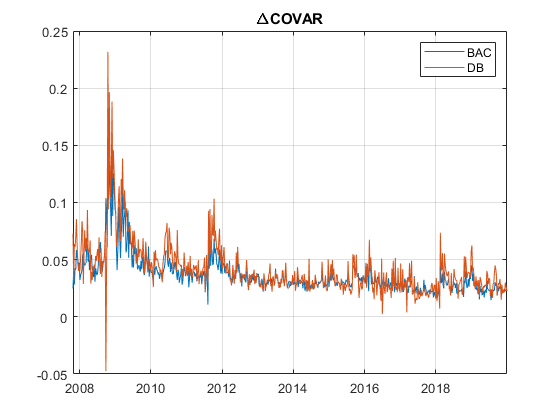

In [50]:
plot(date2,DCOVAR(:,[1,7])); title('\DeltaCOVAR'); grid; legend('BAC','DB')  % Plot the Dcovar for bank BAC, DB

In [12]:
%  Do the same for an expanded Quantile regression:
for i = 1:20,
    RETURN = Return;
    MARKETCAP2 = MarketCap2;
    RETURN(:,i) = [];
    MARKETCAP2(:,i) = [];
    WRETURN1 = RETURN.*MARKETCAP2;
    SRETURN1 = sum(MARKETCAP2,2);
    SRETURN2 = kron(ones(1,19), SRETURN1);
    SYSTEMRET = WRETURN1./SRETURN2;  
    SYSTEMRET = sum(SYSTEMRET,2);
    xx = [Return(:,i) StateVar1];
    xxx = [xx xx.^2 xx.^3];   % We add in a cubic expanion for the i-th bank return and controls
    yy = SYSTEMRET;
    % clear RETURN MARKETCAP2;
    %  p,stats]=quantreg(x,y,tau[,order,nboot]);
    tau1= .95;
    tau2 = .50;
    [p1, stats1] = quantreg(xxx,yy,tau1,[],100);
    [p2, stats2] = quantreg(xxx,yy,tau2,[],100);
       
    VARq05(:,i) = stats1.yfit;
    VARq50(:,i) = stats2.yfit;
    DCOVAR2(:,i) = (VARq05(:,i)-VARq50(:,i));
end;

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
who



Your variables are:

AveReturn1      MarketCap       Return          SRETURN2        StateVar1       VARq50          date2           nst             stats2          xxx             
DCOVAR          MarketCap2      SMC2            SYSTEMRET       TAB1            WRETURN1        i               p1              tau1            yy              
DCOVAR2         RETURN          SMC3            SharePrice      TraceVol        WeightedReturn  index           p2              tau2            
MARKETCAP2      RatioMC         SRETURN1        StateVar        VARq05          date1           index1          stats1          xx              




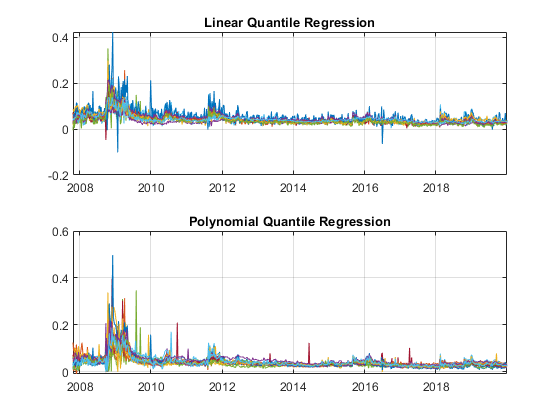

In [18]:
%  Compare the DCOVAR from linear and cubic polynomial regression
subplot(211); plot(date2, DCOVAR); title('Linear Quantile Regression'); grid; ...
subplot(212); plot(date2, DCOVAR2); title('Cubic Polynomial Quantile Regression'); grid; 


We see that the ranges and the dynamics are pretty close.

In [25]:
BankNames = {'BAC','BK','BCS','BBVA', 'C', 'CS', 'DB', 'GS', 'HSBC', 'ING','JPM', 'MS', ...
    'MFG', 'RBC', 'RBS', 'SAN', 'STT', 'SMFG', 'UBS,' 'WFC'};


In [26]:
Maxval = max(DCOVAR2);  % We will use the data first from the Cubic Polynomial Regression


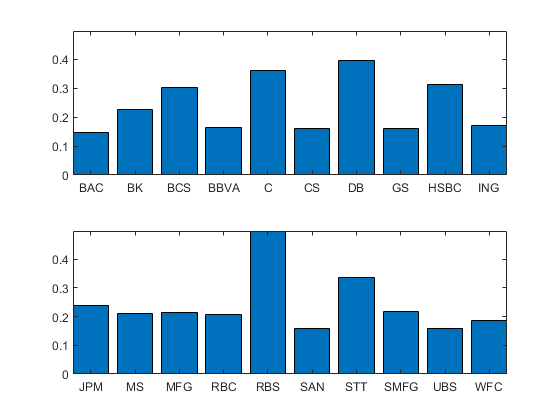

In [41]:
a1 =subplot(211); ...
bar(Maxval(1:10)); axis([1,10, -1,1]);axis tight;...
names = {'BAC';'BK';'BCS';'BBVA'; 'C'; 'CS'; 'DB'; 'GS'; 'HSBC'; 'ING'}; ...
set(gca,'xtick',[1:10],'xticklabel',names);...
a2 = subplot(212); ...
bar(Maxval(11:20)); axis([1,10,-1,1]); axis tight;...
names1 = {'JPM'; 'MS'; ,'MFG'; 'RBC'; 'RBS'; 'SAN'; 'STT'; 'SMFG'; 'UBS'; 'WFC'};
set(gca,'xtick',[1:10],'xticklabel',names1);
linkaxes([a1, a2], 'y');


We see that the RBS is the biggest transmitter of risk to the rest of the banking system, followed by STT, DB, and C.   

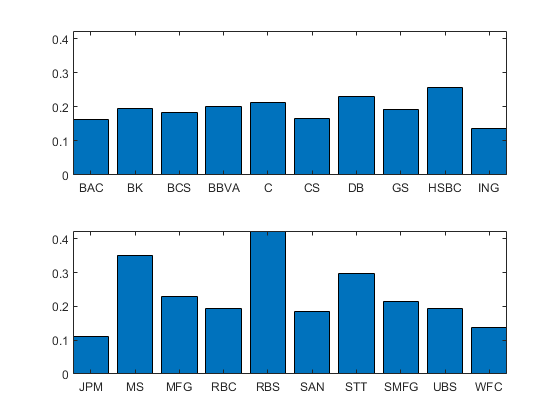

In [42]:
Maxval = max(DCOVAR);  % We will use the data first from the Linear Quantile Regression
a1 =subplot(211); ...
bar(Maxval(1:10)); axis([1,10, -1,1]);axis tight;...
names = {'BAC';'BK';'BCS';'BBVA'; 'C'; 'CS'; 'DB'; 'GS'; 'HSBC'; 'ING'}; ...
set(gca,'xtick',[1:10],'xticklabel',names);...
a2 = subplot(212); ...
bar(Maxval(11:20)); axis([1,10,-1,1]); axis tight;...
names1 = {'JPM'; 'MS'; ,'MFG'; 'RBC'; 'RBS'; 'SAN'; 'STT'; 'SMFG'; 'UBS'; 'WFC'};
set(gca,'xtick',[1:10],'xticklabel',names1);
linkaxes([a1, a2], 'y');


We see that the RBS still stands out, but DB is lower, while MS and STT seem to be the "runners up" in terms of being net transmitters of risk.

In the following section we will examine the Neural Net approximaiton to quantile regression to see if the results are robust to more complex specificaiton.